In [ ]:
###using UsedCarsSA_Unclean_EN dataset
#import packages (library, package.module)
#a package is a collection of modules, a library is a collection of packages.
import pandas as pd #package
import numpy as np #package
import seaborn as sns #library
import matplotlib.pyplot as plt #library


In [ ]:
#import files
from google.colab import files
uploaded = files.upload()

Saving UsedCarsSA_Clean_EN.csv to UsedCarsSA_Clean_EN.csv


In [ ]:
#read data
df = pd.read_csv('UsedCarsSA_Clean_EN.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8035 entries, 0 to 8034
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Make         8035 non-null   object 
 1   Type         8035 non-null   object 
 2   Year         8035 non-null   int64  
 3   Origin       8035 non-null   object 
 4   Color        8035 non-null   object 
 5   Options      8035 non-null   object 
 6   Engine_Size  8035 non-null   float64
 7   Fuel_Type    8035 non-null   object 
 8   Gear_Type    8035 non-null   object 
 9   Mileage      8035 non-null   int64  
 10  Region       8035 non-null   object 
 11  Price        8035 non-null   int64  
 12  Negotiable   8035 non-null   bool   
dtypes: bool(1), float64(1), int64(3), object(8)
memory usage: 761.3+ KB


In [ ]:
#look at the first 2 rows
df.head(2)

,Make,Type,Year,Origin,Color,Options,Engine_Size,Fuel_Type,Gear_Type,Mileage,Region,Price,Negotiable
0,Chrysler,C300,2018,Saudi,Black,Full,5.7,Gas,Automatic,103000,Riyadh,114000,False
1,Nissan,Patrol,2016,Saudi,White,Full,4.8,Gas,Automatic,5448,Riyadh,0,True


In [ ]:
#see how many duplicated rows we have
df.duplicated().sum()

3

In [ ]:
#drop'em
df = df.drop_duplicates()

In [ ]:
#from the info method we know that there's no missing data but we can dubble check it.
df.isna().sum()

Make           0
Type           0
Year           0
Origin         0
Color          0
Options        0
Engine_Size    0
Fuel_Type      0
Gear_Type      0
Mileage        0
Region         0
Price          0
Negotiable     0
dtype: int64

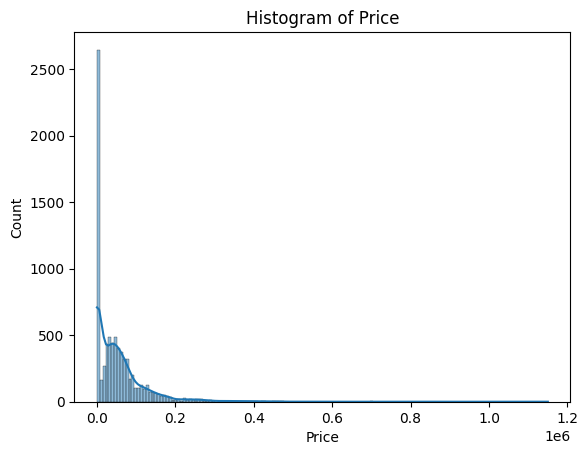

In [ ]:
#visulazie price
sns.histplot(df.Price, kde= True)
plt.title('Histogram of Price');

In [ ]:
#as shown in the histogram, there's many cars that haze 0 as a price which is not correct
#i'll set a minimum price 5k
df = df[df['Price'] >= 5000]

In [ ]:
#check after the cut-off
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5411 entries, 0 to 8034
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Make         5411 non-null   object 
 1   Type         5411 non-null   object 
 2   Year         5411 non-null   int64  
 3   Origin       5411 non-null   object 
 4   Color        5411 non-null   object 
 5   Options      5411 non-null   object 
 6   Engine_Size  5411 non-null   float64
 7   Fuel_Type    5411 non-null   object 
 8   Gear_Type    5411 non-null   object 
 9   Mileage      5411 non-null   int64  
 10  Region       5411 non-null   object 
 11  Price        5411 non-null   int64  
 12  Negotiable   5411 non-null   bool   
dtypes: bool(1), float64(1), int64(3), object(8)
memory usage: 554.8+ KB


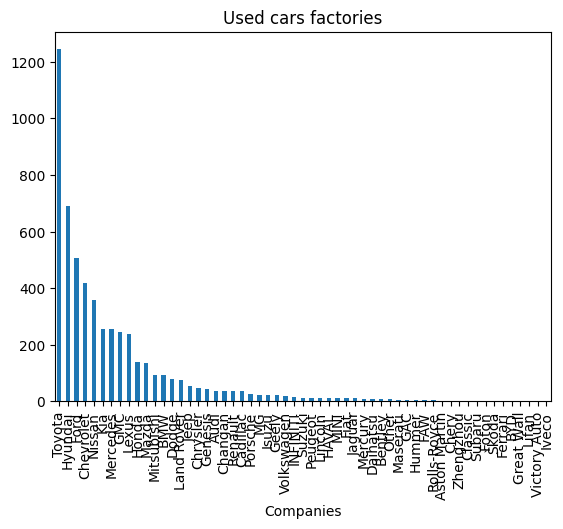

In [ ]:
#check how many manifacurer we have
df['Make'].value_counts().plot(kind = 'bar')
plt.title('Used cars factories')
plt.xlabel('Companies');

In [ ]:
#group_company = df.groupby(by= ['Color']).count()
#print(group_company)

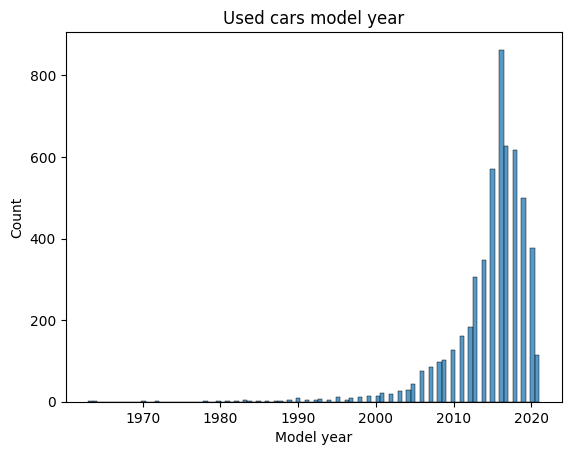

In [ ]:
#check the used cars years
sns.histplot(df.Year)
plt.title('Used cars model year')
plt.xlabel('Model year');

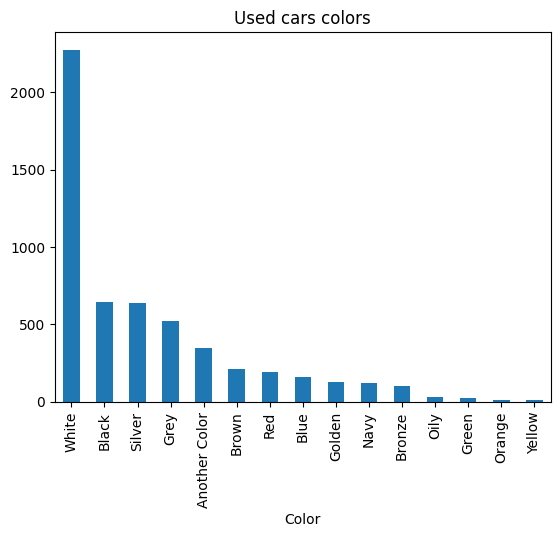

<Figure size 1000x500 with 0 Axes>

In [ ]:
#plot the  colors
df['Color'].value_counts().plot(kind = 'bar')
plt.title('Used cars colors')
plt.xlabel('Color')
plt.figure(figsize=(10, 5));

In [ ]:
#count colors
colors_count = df.Color.value_counts()
print(colors_count)

White            2276
Black             646
Silver            638
Grey              524
Another Color     348
Brown             214
Red               190
Blue              158
Golden            125
Navy              118
Bronze            104
Oily               32
Green              22
Orange              8
Yellow              8
Name: Color, dtype: int64


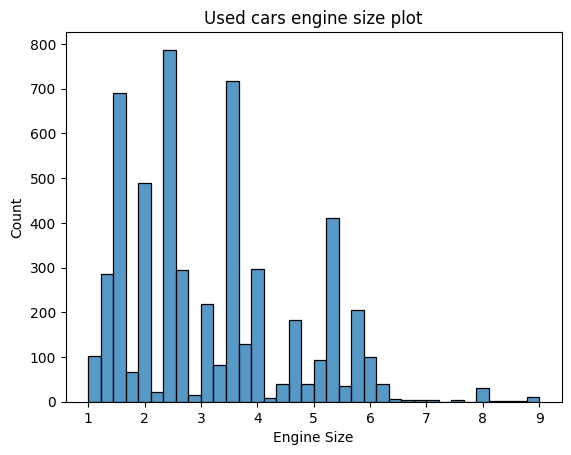

In [ ]:
#plot engine size
sns.histplot(df.Engine_Size)
plt.title('Used cars engine size plot')
plt.xlabel('Engine Size');

In [ ]:
#descriptive stat
df.describe()

,Year,Engine_Size,Mileage,Price
count,5411.000000,5411.000000,5.411000e+03,5.411000e+03
mean,2014.786916,3.183607,1.403840e+05,7.967846e+04
std,5.134482,1.467859,3.374333e+05,7.500309e+04
min,1963.000000,1.000000,1.000000e+02,5.000000e+03
25%,2013.000000,2.000000,4.800000e+04,3.600000e+04
50%,2016.000000,2.700000,1.020000e+05,5.850000e+04
75%,2018.000000,4.000000,1.815575e+05,9.500000e+04
max,2021.000000,9.000000,2.000000e+07,1.150000e+06


In [ ]:
#correlation (df.select_stype(include='number'))
dfcor = df.select_dtypes(include='number').corr().style.background_gradient();
#there is a positive correlarion between year & engine size with the price
dfcor

,Year,Engine_Size,Mileage,Price
Year,1.000000,-0.222924,-0.183601,0.324724
Engine_Size,-0.222924,1.000000,0.038914,0.304965
Mileage,-0.183601,0.038914,1.000000,-0.123344
Price,0.324724,0.304965,-0.123344,1.000000


Machine Learning (predict price)

In [ ]:
#import libraries
import sklearn

In [ ]:
#response (target/label/dependant/output variable that we wanna predict)!
#features are the independant variables

#initial dimention
df.shape

(5411, 13)

In [ ]:
#features
df.drop('Price', axis=1).head()

,Make,Type,Year,Origin,Color,Options,Engine_Size,Fuel_Type,Gear_Type,Mileage,Region,Negotiable
0,Chrysler,C300,2018,Saudi,Black,Full,5.7,Gas,Automatic,103000,Riyadh,False
2,Nissan,Sunny,2019,Saudi,Silver,Standard,1.5,Gas,Automatic,72418,Riyadh,False
3,Hyundai,Elantra,2019,Saudi,Grey,Standard,1.6,Gas,Automatic,114154,Riyadh,False
4,Hyundai,Elantra,2019,Saudi,Silver,Semi Full,2.0,Gas,Automatic,41912,Riyadh,False
5,Honda,Accord,2018,Saudi,Navy,Full,1.5,Gas,Automatic,39000,Riyadh,False


In [ ]:
#response
df['Price'].head()

0    114000
2     27500
3     43000
4     59500
5     72000
Name: Price, dtype: int64

In [ ]:
##Modeling process labraries
from plotnine import ggplot, aes, geom_density, geom_line, geom_point, ggtitle
from sklearn.model_selection import train_test_split, KFold, RepeatedKFold, cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.metrics import mean_squared_error, roc_auc_score

In [ ]:
#Data splitting (simple data sampling)
train, test = train_test_split(df, train_size=0.7, random_state=123)
#dimention of train data
train.shape

(3787, 13)

In [ ]:
#plot the target
(ggplot(df, aes('Price'))
 + geom_density()
 + ggtitle("The target in the entire dataset"));

In [ ]:
#target in the training & test data?
(ggplot(train, aes('Price'))
 + geom_density(color = "blue")
 + geom_density(data = test, color = "red")
 + ggtitle("Random sampling with Python"));

Creating models


In [ ]:
#seperate label from features
X_train = train[['Year', 'Engine_Size']]
y_train = train['Price']

#fit a KNN regressor model with 10 neighbors
knn = KNeighborsRegressor(n_neighbors=10)
m1 = knn.fit(X_train, y_train)

m1

KNeighborsRegressor(n_neighbors=10)

In [ ]:
#y_hat
m1.predict(X_train)

array([ 65750.,  58500.,  48780., ..., 210200.,  22200., 115000.])

In [ ]:
#y_i
y_train

1484     58500
5463     45000
1117     48500
5850      6000
7131     52000
         ...  
7708     47500
5613     17000
1608    342000
4620     15000
4851    138000
Name: Price, Length: 3787, dtype: int64

Evaluating model

In [ ]:
pred = m1.predict(X_train)
#compute mse (Mean Squared Error is a loss function)
mse = mean_squared_error(y_train, pred)
mse

2469070504.8088226

In [ ]:
#calculate rmse
import math
rmse = math.sqrt(mse)
rmse

49689.742450618745

Resampling

In [ ]:
#Cross Validation (instead of manula splitting 70-80% train, test)

#defined the loss function
loss = 'neg_root_mean_squared_error' #what?

#create 10 folds cross validation object
kfold = KFold(n_splits=10, random_state=123, shuffle=True)

#fit model with 10-fold cv
results = cross_val_score(m1, X_train, y_train, cv=kfold, scoring=loss)
results

array([-52053.11919496, -50906.38127616, -63914.9719454 , -56238.42889251,
       -58008.45548836, -42998.89482876, -54572.77769602, -48038.77319958,
       -56881.66504867, -43937.51503156])

In [ ]:
results.mean()

-52755.09826019779

In [ ]:
# 10 fold cross validation repated 5 times (total of 50 folds)
rkf = RepeatedKFold(n_splits=10, n_repeats=5, random_state=123)
results = cross_val_score(m1, X_train, y_train, cv=rkf, scoring=loss)
results

array([-52053.11919496, -50906.38127616, -63914.9719454 , -56238.42889251,
       -58008.45548836, -42998.89482876, -54572.77769602, -48038.77319958,
       -56881.66504867, -43937.51503156, -71633.29374883, -47845.17187888,
       -46885.53542385, -45797.37251225, -49675.00594738, -49162.09250347,
       -43929.83977799, -55044.68387518, -64626.84830998, -54722.47365655,
       -49852.33572627, -49228.553426  , -45617.18538793, -61618.12981767,
       -50058.44020239, -66267.3665179 , -42706.5280313 , -40748.63483019,
       -71677.98070541, -52805.37887324, -64975.23035432, -53570.1099687 ,
       -52478.59427907, -70103.81167245, -56978.77470893, -46392.43672714,
       -37190.3184863 , -53492.47820759, -53294.86427881, -44885.66570869,
       -59143.99867094, -67419.77578618, -45114.66881045, -41978.03522748,
       -54870.99870195, -48728.90157829, -61978.98634115, -38785.94641254,
       -55479.0063864 , -54963.29150279])

In [ ]:
# average RMSE across all 50 folds
results.mean()

-52985.594551296446

Hyperparameter Tuning

In [ ]:
# basic model object
knn = KNeighborsRegressor() #in the 1st example, we specify how many neighbors we want, here we want to search the optimal neighbor that reduces the loss function

# Create grid of hyperparameter values (dictionary!) << not sure why though
hyper_grid = {'n_neighbors': range(2, 26)}

#tune a knn model using grid search
grid_search = GridSearchCV(knn, hyper_grid, cv=kfold, scoring=loss)
results = grid_search.fit(X_train, y_train)

#best model's score
abs(results.best_score_)


52575.66975207169

In [ ]:
#best model's k value
results.best_estimator_.get_params().get('n_neighbors')

14

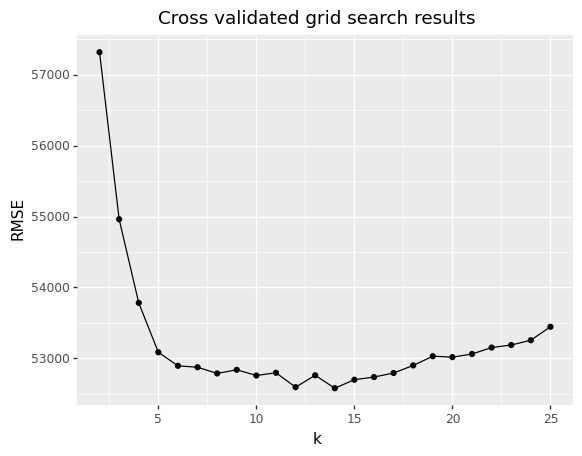

<ggplot: (8794047141204)>

In [ ]:
# Plot all RMSE results
all_rmse = pd.DataFrame({'k': range(2, 26),
                         'RMSE': np.abs(results.cv_results_['mean_test_score'])})

(ggplot(all_rmse, aes(x='k', y='RMSE'))
 + geom_line()
 + geom_point()
 + ggtitle("Cross validated grid search results"))

##the pic results show that 12 is almost identical to 14, why it wasn't chosen?

## Putting the process together!!!

In [ ]:
# 1-create train/test split
train, test = train_test_split(df, train_size=0.7, random_state=123)

# 2-seperate features from labels only use numeric features
X_train = train.select_dtypes(include='number').drop("Price", axis=1)
y_train = train["Price"]

# 3-create a knn model object
knn = KNeighborsRegressor()

# 4-define the loss function
loss = 'neg_root_mean_squared_error'

# 5-create 10 fold cv object
kfold = KFold(n_splits=10, random_state=123, shuffle=True)

# 6-create grid of hyperparameter value
hyper_grid = {'n_neighbors': range(2, 26)}

# 7-tune a knn model using grid search
grid_search = GridSearchCV(knn, hyper_grid, cv=kfold, scoring=loss)
results = grid_search.fit(X_train, y_train)

# 8- best model's cross validated RMSE
abs(results.best_score_)

#Personal note: The loss function is heigher that the previous ones because it included all numerical features where I chose only the 2 correlated with price in the old ones


66879.13758949857

In [ ]:
# Best model's k value
results.best_estimator_.get_params().get('n_neighbors')

23

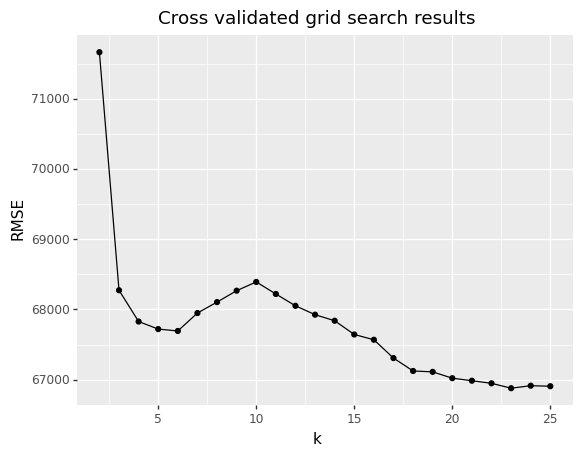

<ggplot: (8794047175584)>

In [ ]:
# Plot all RMSE results
all_rmse = pd.DataFrame({'k': range(2, 26),
                         'RMSE': np.abs(results.cv_results_['mean_test_score'])})

(ggplot(all_rmse, aes(x='k', y='RMSE'))
 + geom_line()
 + geom_point()
 + ggtitle("Cross validated grid search results"))

In [ ]:
## Exercises in ML 02 modeling process


??(MISSING PIECE) What about the test 30% of test (incase we didn't used CV)?

# **Engineering**

In [ ]:
# Helper packages
import missingno as msno
import numpy as np
import pandas as pd
from plotnine import ggplot, aes, geom_density, geom_line, geom_point, ggtitle

# Modeling pre-processing with scikit-learn functionality
from sklearn.model_selection import train_test_split
from sklearn.compose import TransformedTargetRegressor
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_selector as selector
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
from sklearn.feature_selection import VarianceThreshold
from sklearn.decomposition import PCA

# Modeling pre-processing with non-scikit-learn packages
#from category_encoders.ordinal import OrdinalEncoder
#from feature_engine.encoding import RareLabelEncoder

# Modeling
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import Pipeline

In [ ]:
# create train/test split
train, test = train_test_split(df, train_size=0.7, random_state=123)

# separate features from labels and only use numeric features
X_train = train.drop("Price", axis=1)
y_train = train[["Price"]]

## Target Engineering (Transforming)

In [ ]:
tt = TransformedTargetRegressor(transformer=PowerTransformer(method='box-cox'))
tt

TransformedTargetRegressor(transformer=PowerTransformer(method='box-cox'))

## Dealing with missingness

In [ ]:
##Try the raw data here!!
from google.colab import files
uploaded = files.upload()


Saving UsedCarsSA_Unclean_EN.csv to UsedCarsSA_Unclean_EN.csv


In [ ]:
df_raw = pd.read_csv("UsedCarsSA_Unclean_EN.csv")

# count missing values
df_raw.isnull().sum()

Link              0
Make              0
Type              0
Year              0
Origin           95
Color             0
Options         109
Engine_Size    2266
Fuel_Type         0
Gear_Type        74
Condition         0
Mileage           0
Region            0
Price             0
Negotiable        0
dtype: int64

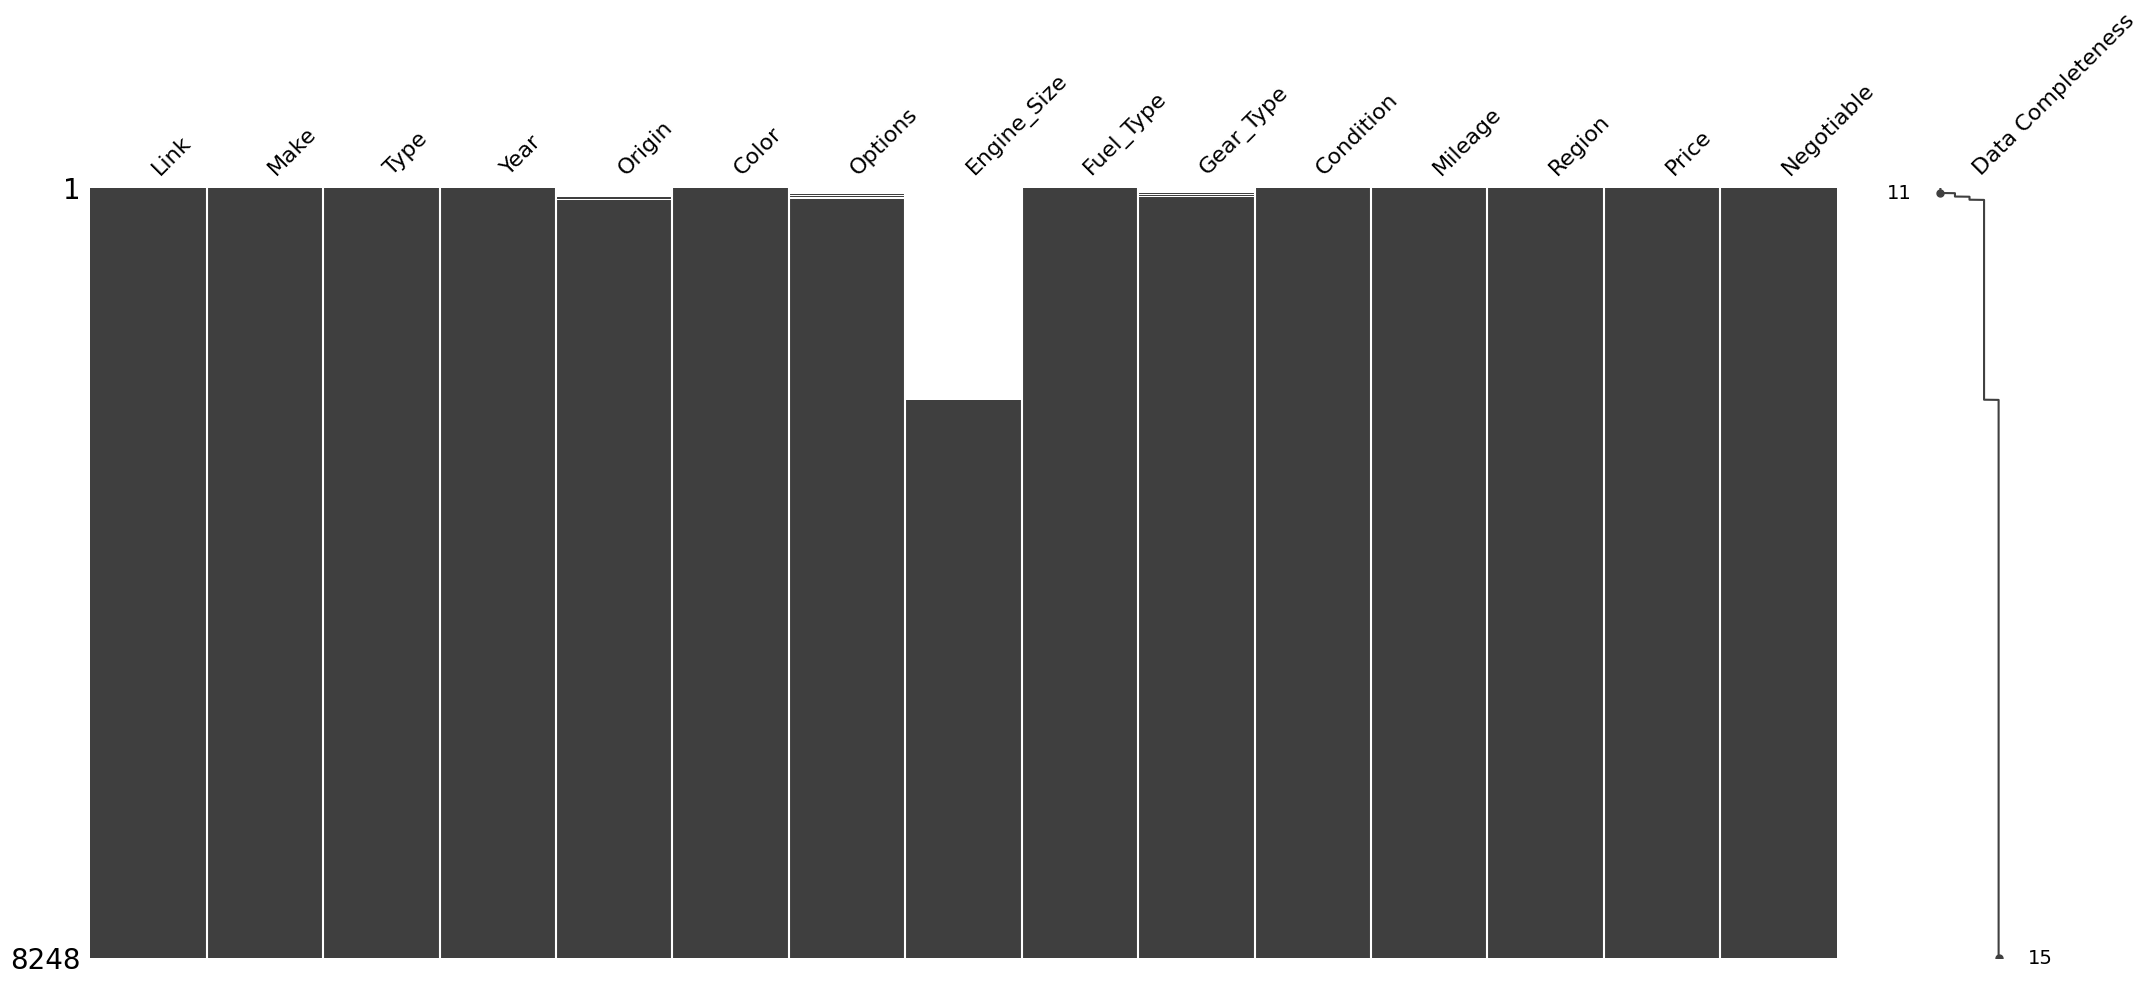

In [ ]:
# missingness is represented with white
msno.matrix(df_raw, labels=True, filter="bottom", sort="ascending", n=50);

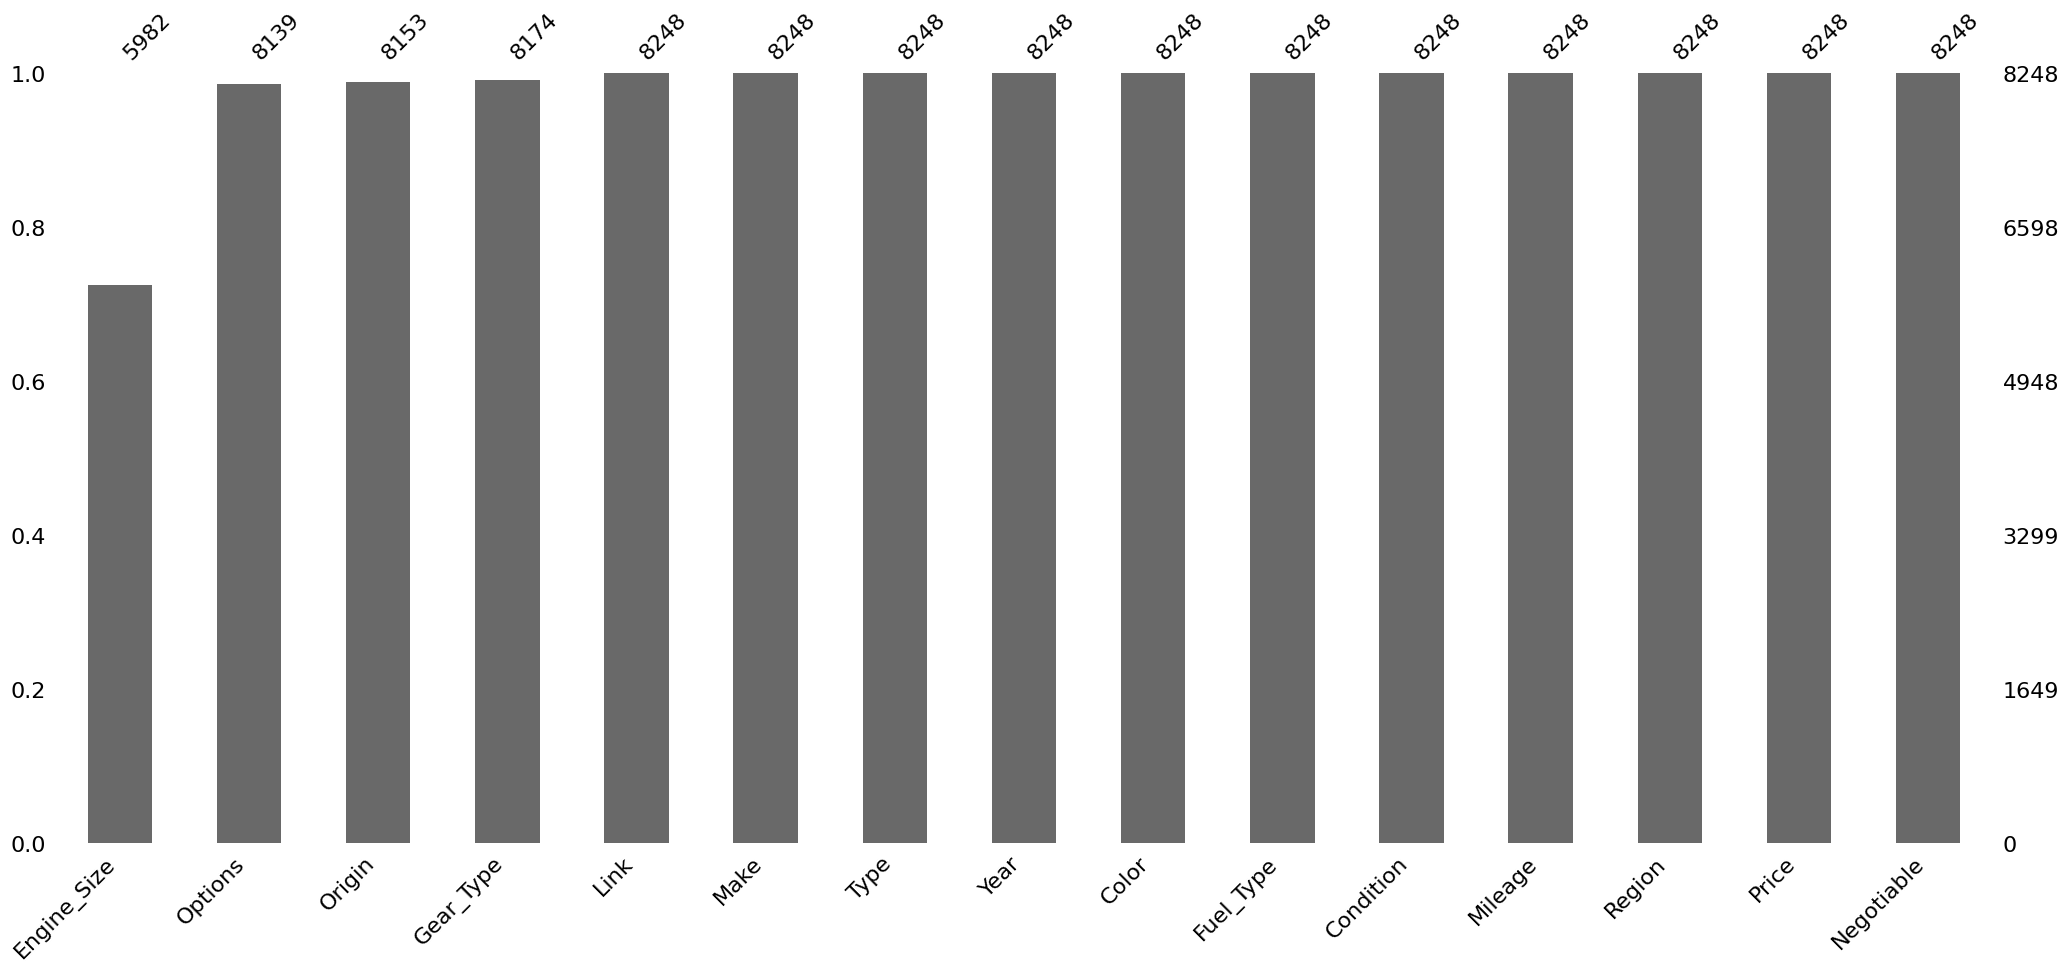

In [ ]:
# which features have most missing?
# this chart shows the number of observations so small bars (i.e. Pool QC)
# represent very few observed values (lots of missingness)
msno.bar(df_raw, labels=True, filter="bottom", sort="ascending", n=50);

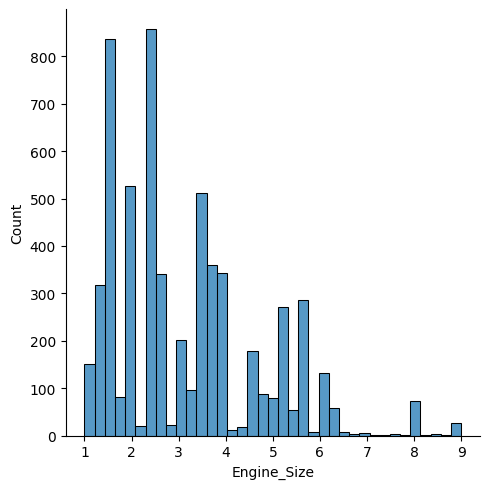

In [ ]:
sns.displot(df_raw.Engine_Size);


In [ ]:
df_raw.head(2)

,Link,Make,Type,Year,Origin,Color,Options,Engine_Size,Fuel_Type,Gear_Type,Condition,Mileage,Region,Price,Negotiable
0,https://syarah.com/%D9%83%D8%B1%D8%A7%D9%8A%D8...,Chrysler,C300,2018,Saudi,Black,Full,5.7,Gas,Automatic,Used,103000,Riyadh,114000,False
1,https://syarah.com/%D9%86%D9%8A%D8%B3%D8%A7%D9...,Nissan,Patrol,2016,Saudi,White,Full,4.8,Gas,Automatic,Used,5448,Riyadh,Negotiable,True


## Imputation

Estimated statistic

In [ ]:
# median imputation to all features
a = SimpleImputer(strategy='median')

# median imputation to just numeric predictors
b = ColumnTransformer([("num_imp", a, selector(dtype_include="number"))])

# median imputation to 1 or more features
c = ColumnTransformer([("num_imp", a, selector("Engine_size"))])

 K-nearest neighbor

In [ ]:
knn_imp = KNNImputer(n_neighbors=6)

## Feature filtering

In [ ]:
nzv = VarianceThreshold(threshold=0.1)

## Numeric feature engineering (skewness)

In [ ]:
# Normalizing approach
yj = PowerTransformer(method="yeo-johnson")

# Normalize all numeric features
X_norm = ColumnTransformer([("norm", yj, selector(dtype_include="number"))])

## Standardization

In [ ]:
# Normalizing approach
scaler = StandardScaler()

# standardize all numeric features
std = ColumnTransformer([("norm", scaler, selector(dtype_include="number"))])

## Categorical feature engineering

### One-hot & dummy encoding

In [ ]:
# one-hot encoder
encoder = OneHotEncoder()

# apply to all categorical features
ohe = ColumnTransformer([("one-hot", encoder, selector(dtype_include="object"))])

# dummy encode
encoder = OneHotEncoder(drop='first')

# apply to all categorical features
de = ColumnTransformer([("dummy", encoder, selector(dtype_include="object"))])

### Label encoding

In [ ]:
encoder = LabelEncoder()

# Label encode a single column
lbl = ColumnTransformer([("label", encoder, "MS_SubClass")])

### Ordinal encoding

In [ ]:
#NOT APPLICABLE IN MY CASE
# ID all quality features to ordinal encode
cols = list(X_train.filter(regex=("Qual$|QC$|Cond$")).columns)

# specify levels in order
lvs = ["Very_Poor", "Poor", "Fair", "Below_Average", "Average", "Typical",
       "Above_Average", "Good", "Very_Good", "Excellent", "Very_Excellent"]
val = range(0, len(lvs))

# create a level to integer mapping
lvl_map = dict(zip(lvs, val))
category_mapping = [{'col': col, 'mapping': lvl_map} for col in cols]

# example of first two mappings
category_mapping[0:2]

[]

In [ ]:
# Apply ordinal encoder
cat_encoder = OrdinalEncoder(cols=cols, mapping=category_mapping)

## Lumping?

In [ ]:
# create rare label encoder
rare_encoder = RareLabelEncoder(tol=0.01, replace_with="other")

# demonstrate how some neighborhoods are now represented by "other"
rare_encoder.fit_transform(X_train)["Neighborhood"].unique()

## Dimension reduction

In [ ]:
# PCA object - keep 25 components
pca = PCA(n_components=3)

# apply PCA to all numeric features
pca_encoder = ColumnTransformer([("pca", pca, selector(dtype_include="number"))])

## Putting the process together

In [ ]:
# create train/test split
train, test = train_test_split(df, train_size=0.7, random_state=123)

# separate features from labels and only use numeric features
X_train = train.drop("Price", axis=1)
y_train = train["Price"]
X_test = test.drop("Price", axis=1)
y_test = test["Price"]

# create KNN model object
knn = KNeighborsRegressor()

# define loss function
loss = 'neg_root_mean_squared_error'

# create 10 fold CV object
kfold = KFold(n_splits=10, random_state=123, shuffle=True)

# Create grid of hyperparameter values
hyper_grid = {'knn__n_neighbors': range(2, 26)}

In [ ]:
# 1. Remove near-zero variance features that are categorical
nzv_encoder = VarianceThreshold(threshold=0.1)

In [ ]:
# 2. Ordinal encode our quality-based features
ord_cols = list(X_train.filter(regex=("Qual$|QC$|Cond$")).columns)
lvs = ["Very_Poor", "Poor", "Fair", "Below_Average", "Average", "Typical",
       "Above_Average", "Good", "Very_Good", "Excellent", "Very_Excellent"]
val = range(0, len(lvs))
lvl_map = dict(zip(lvs, val))

In [ ]:
lvl_map

{'Very_Poor': 0,
 'Poor': 1,
 'Fair': 2,
 'Below_Average': 3,
 'Average': 4,
 'Typical': 5,
 'Above_Average': 6,
 'Good': 7,
 'Very_Good': 8,
 'Excellent': 9,
 'Very_Excellent': 10}

In [ ]:
category_mapping = [{'col': col, 'mapping': lvl_map} for col in ord_cols]
ord_encoder = OrdinalEncoder(cols=ord_cols, mapping=category_mapping)
ord_encoder

In [ ]:
# 3. Center and scale (i.e., standardize) all numeric features
scaler = StandardScaler()

# 4. Perform dimension reduction by applying PCA to all numeric features
pca = PCA(n_components=3)

# 5. One-hot encode remaining categorical features.
encoder = OneHotEncoder(handle_unknown="ignore")

## INTERESTING PREPROSSING PIPLINE!!!!!!!!!!!

In [ ]:
#(NOT APPLICABLE HERE)
# combine all steps into a preprocessing pipeline
preprocessor = ColumnTransformer(
  remainder="passthrough",
  transformers=[
  ("nzv_encode", nzv_encoder, selector(dtype_include="number")),
  ("ord_encode", ord_encoder, ord_cols),
  ("std_encode", scaler, selector(dtype_include="number")),
  ("pca_encode", pca, selector(dtype_include="number")),
  ("one-hot", encoder, selector(dtype_include="object")),
  ])

In [ ]:
#(APPLICABLE HERE)
# combine all steps into a preprocessing pipeline
preprocessor = ColumnTransformer(
  remainder="passthrough",
  transformers=[
  ("nzv_encode", nzv_encoder, selector(dtype_include="number")),
  ("std_encode", scaler, selector(dtype_include="number")),
  ("pca_encode", pca, selector(dtype_include="number")),
  ("one-hot", encoder, selector(dtype_include="object")),
  ])

In [ ]:
preprocessor

ColumnTransformer(remainder='passthrough',
                  transformers=[('nzv_encode', VarianceThreshold(threshold=0.1),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7ff860978dc0>),
                                ('std_encode', StandardScaler(),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7ff86097b850>),
                                ('pca_encode', PCA(n_components=3),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7ff860978040>),
                                ('one-hot',
                                 OneHotEncoder(handle_unknown='ignore'),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7ff86097ba60>)])

In [ ]:
model_pipeline = Pipeline(steps=[
  ("preprocessor", preprocessor),
  ("knn", knn),
])

In [ ]:
model_pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('nzv_encode',
                                                  VarianceThreshold(threshold=0.1),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7ff860978dc0>),
                                                 ('std_encode',
                                                  StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7ff86097b850>),
                                                 ('pca_encode',
                                                  PCA(n_components=3),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7ff860978040>),
                                                 ('one-hot',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7ff86097ba60>)])),
                ('knn', KNeighborsRegressor())])

In [ ]:
##WHATS WRONG?

# Tune a knn model using grid search
grid_search = GridSearchCV(model_pipeline, hyper_grid, cv=kfold, scoring=loss)
results = grid_search.fit(X_train, y_train)

# Best model's cross validated RMSE
abs(results.best_score_)

69244.52142743123

In [ ]:
# Best model's k value
results.best_estimator_.get_params().get('knn__n_neighbors')

25

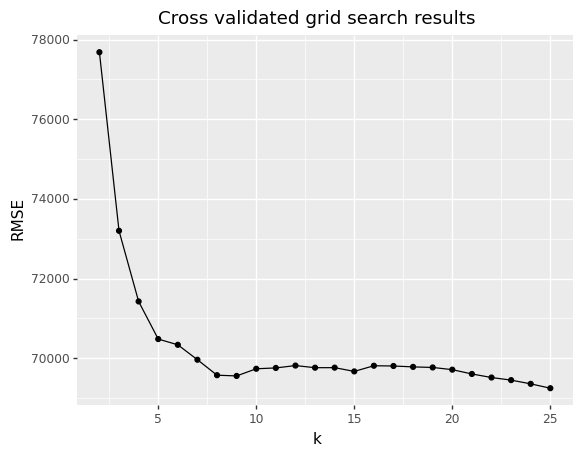

<ggplot: (8794046870390)>

In [ ]:
# Plot all RMSE results
all_rmse = pd.DataFrame({'k': range(2, 26),
                         'RMSE': np.abs(results.cv_results_['mean_test_score'])})

(ggplot(all_rmse, aes(x='k', y='RMSE'))
 + geom_line()
 + geom_point()
 + ggtitle("Cross validated grid search results"))

#Linear Regression

In [ ]:
# Helper packages
import pandas as pd
import numpy as np

# Modeling packages
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn import compose
from sklearn import cross_decomposition
from sklearn import decomposition
from sklearn import model_selection
from sklearn import linear_model
from sklearn import pipeline

In [ ]:
# Used cars data
df = pd.read_csv("UsedCarsSA_Clean_EN.csv")

# create train/test split
train, test = train_test_split(df, train_size=0.7, random_state=123)

# separate features from labels and only use numeric features
X_train = train.drop("Price", axis=1)
y_train = train[["Price"]]

## Simple linear regression

### Best fit line

In [ ]:
# create linear regression model object
lm_mod = linear_model.LinearRegression()

# fit linear model with only Gr_Liv_Area feature
lm_fit = lm_mod.fit(X_train[["Engine_Size"]], y_train)

###coeffcients

β1 is the expected change in the outcome Y per unit change in X (source: quantifyinghealth)
the amount y changes for a unit increase in x. In this way it represents the degree to which the line slopes upwards or downwards (source: BMJ)

In [ ]:
# intercept
lm_fit.intercept_

array([28755.91422332])

In [ ]:
# coefficient for Gr_Liv_Area
lm_fit.coef_

array([[7767.86706647]])

## Multiple linear regression

In [ ]:
# create linear regression model object
lm_mod = linear_model.LinearRegression()

# fit linear model with only Gr_Liv_Area and Year_Built feature
lm_fit = lm_mod.fit(X_train[["Engine_Size", "Year"]], y_train)

### Coefficients

In [ ]:
# intercept
lm_fit.intercept_

array([-9126498.99346058])

In [ ]:
# coefficients for Engine size and Year
lm_fit.coef_

array([[11845.05938028,  4538.84488193]])

### Interactions
#### Interactions in Multiple Linear Regression. Basic Ideas. Interaction: An interaction occurs when an independent variable has a different effect on the outcome depending on the values of another independent variable. (source: mcgill.ca)

In [ ]:
# create linear regression model object
lm_mod = linear_model.LinearRegression()

# use PolynomialFeatures to create main Engine_Size and Year effects and
# also an interaction effect between Gr_Liv_Area & Year_Built
effects = preprocessing.PolynomialFeatures(
  interaction_only=True,
  include_bias=False
  )
features = effects.fit_transform(X_train[["Engine_Size", "Year"]])

# fit linear model with only Engine_Size and Year_Built feature and
# also include an interaction effect (Engine_Size:Year_Built)
lm_fit = lm_mod.fit(features, y_train)

In [ ]:
# coefficients for Engine_Size, Year effects and the interaction
# effect between Engine_Size & Year
lm_fit.coef_

array([[-1.89744017e+06,  1.18704309e+03,  9.48340571e+02]])

### Many features

In [ ]:
# create new feature set with categorical features dummy encoded
encoder = preprocessing.OneHotEncoder(drop='first')
cat_feat_only = compose.make_column_selector(dtype_include="object")
preprocessor = compose.ColumnTransformer(
  remainder="passthrough",
  transformers=[("one-hot", encoder, cat_feat_only)]
  )
X_train_encoded = preprocessor.fit_transform(X_train)

# MLR model with new dummy encoded feature set
lm_mod = linear_model.LinearRegression()
lm_fit = lm_mod.fit(X_train_encoded, y_train)

In [ ]:
# first 10 coefficients
lm_fit.coef_[0, 0:10]

array([  82.32633552,  523.80066729,  -20.58423009,  198.36219248,
        152.47046663, -196.99957789,   -9.01122885, -232.4393708 ,
        -50.78142655,    4.2270696 ])

## Assessing model accuracy

In [ ]:
# feature sets to compare across
feature_set1 = X_train[["Engine_Size"]]
feature_set2 = X_train[["Engine_Size", "Year"]]
feature_set3 = X_train_encoded
feature_sets = {'lm1': feature_set1, 'lm2': feature_set2, 'lm3': feature_set3}

# define loss function
loss = 'neg_root_mean_squared_error'

# create 10 fold CV object
kfold = model_selection.KFold(n_splits=10, random_state=8451, shuffle=True)

# object to store CV RMSE results
results = {}

for name, feat in feature_sets.items():
  # create LM model object
  lm_mod = linear_model.LinearRegression()

  # execute and score the cross validation procedure
  cv_results = model_selection.cross_val_score(
    estimator=lm_mod,
    X=feat,
    y=y_train,
    cv=kfold,
    scoring=loss
    )
  results[name] = np.absolute(cv_results.mean())

In [ ]:
results

{'lm1': 72009.34806484636, 'lm2': 67476.4368565338, 'lm3': 64698.30142665489}

## Principal component regression

In [ ]:
# create linear model object
lm_mod = linear_model.LinearRegression()

# create k-fold cross validation object
kfold = model_selection.KFold(n_splits=5, random_state=8451, shuffle=True)

# define loss function
loss = 'neg_root_mean_squared_error'

# create our preprocessing steps which includes performing PCA
# with 10 components
scaler = preprocessing.StandardScaler()
pca = decomposition.PCA(n_components=3) #when we apply PCA to the original dataset with p number of variables to get a transformed dataset with k number of variables (principal components), n_components is equal to k, where the value of k is much less than the value of p (source: towardsdatascience)
encoder = preprocessing.OneHotEncoder(handle_unknown="ignore")
num_feat_only = compose.make_column_selector(dtype_include="number")
cat_feat_only = compose.make_column_selector(dtype_include="object")

# combine all steps into a pre-processing pipeline
preprocessor = compose.ColumnTransformer(
  remainder="passthrough",
  transformers=[
  ("std_encode", scaler, num_feat_only),
  ("pca_encode", pca, num_feat_only),
  ("one-hot", encoder, cat_feat_only),
  ])

# create a pipeline object that combines model with recipe
model_pipeline = pipeline.Pipeline(steps=[
  ("preprocessor", preprocessor),
  ("lm", lm_mod),
])

# train and fit our model
cv_results = model_selection.cross_val_score(
  estimator=model_pipeline,
  X=X_train,
  y=y_train,
  cv=kfold,
  scoring=loss
  )

# get results
np.absolute(cv_results.mean())

65491.213474318465

###Tuning

In [ ]:
# create k-fold cross validation object
kfold = model_selection.KFold(n_splits=5, random_state=8451, shuffle=True)

# define loss function
loss = 'neg_root_mean_squared_error'

# create our preprocessing steps
scaler = preprocessing.StandardScaler()
encoder = preprocessing.OneHotEncoder(handle_unknown="ignore")
num_feat_only = compose.make_column_selector(dtype_include="number")
cat_feat_only = compose.make_column_selector(dtype_include="object")

# create object to save results
results = {}

# iterate over over 2, 4, 6, ..., 26 components and train model
for n_comp in range(2, 3, 2):
  # create PCA object with n components
  pca = decomposition.PCA(n_components=n_comp)

# combine all steps into a pre-processing pipeline
  preprocessor = compose.ColumnTransformer(
    remainder="passthrough",
    transformers=[
    ("std_encode", scaler, num_feat_only),
    ("pca_encode", pca, num_feat_only),
    ("one-hot", encoder, cat_feat_only),
    ])

  # create linear model object
  lm_mod = linear_model.LinearRegression()

  # create a pipeline object that combines model with recipe
  model_pipeline = pipeline.Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("lm", lm_mod),
  ])

  # train and fit our model
  cv_results = model_selection.cross_val_score(
    estimator=model_pipeline,
    X=X_train,
    y=y_train,
    cv=kfold,
    scoring=loss
    )

  # get results
  results[n_comp] = np.absolute(cv_results.mean())

In [ ]:
pd.DataFrame.from_dict(
  results,
  orient='index',
  columns=['RMSE']
  ).rename_axis('n_components').reset_index()

## Partial least squares

PLS is a predictive technique that is an alternative to ordinary least squares (OLS) regression, canonical correlation, or structural equation modeling, and it is particularly useful when predictor variables are highly correlated or when the number of predictors exceeds the number of cases (source:bmj).


In [ ]:
# create linear model object
pls_mod = cross_decomposition.PLSRegression()

# create k-fold cross validation object
kfold = model_selection.KFold(n_splits=5, random_state=8451, shuffle=True)

# define loss function
loss = 'neg_root_mean_squared_error'

# create our preprocessing steps to normalize and one-hot encode
scaler = preprocessing.StandardScaler()
encoder = preprocessing.OneHotEncoder(handle_unknown="ignore", sparse_output=False) #spars was changed to sparse_output
num_feat_only = compose.make_column_selector(dtype_include="number")
cat_feat_only = compose.make_column_selector(dtype_include="object")

# combine all steps into a pre-processing pipeline
preprocessor = compose.ColumnTransformer(
  remainder="passthrough",
  transformers=[
    ("std_encode", scaler, num_feat_only),
    ("one-hot", encoder, cat_feat_only),
  ])

# create a pipeline object that combines model with recipe
model_pipeline = pipeline.Pipeline(steps=[
  ("preprocessor", preprocessor),
  ("pls", pls_mod),
])

# Create grid of hyperparameter values
hyper_grid = {'pls__n_components': range(2, 28, 2)}

# Tune a knn model using grid search
grid_search = model_selection.GridSearchCV(
  model_pipeline,
  hyper_grid,
  cv=kfold,
  scoring=loss
  )

results = grid_search.fit(X_train, y_train)

# Best model's cross validated RMSE
abs(results.best_score_)

47299.464357264915

In [ ]:
# Optimal number of components
results.best_estimator_.get_params().get('pls__n_components')

6

# Module 05: Logistic Regression

In [ ]:
# Helper packages
import seaborn as sns
import matplotlib.pyplot as plt

import pandas as pd
from plotnine import *

# Modeling packages
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
#from sklearn.metrics import roc_auc_score, plot_roc_curve << old
#from scikitplot.metrics import plot_roc_curve
from sklearn.metrics import RocCurveDisplay


In [ ]:
#upload the dataset
from google.colab import files
uploaded = files.upload()

Saving pima.csv to pima.csv


In [ ]:
#Using the diabetes data set
pima = pd.read_csv("pima.csv")

In [ ]:
pima.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pregnant  768 non-null    int64  
 1   glucose   768 non-null    int64  
 2   pressure  768 non-null    int64  
 3   triceps   768 non-null    int64  
 4   insulin   768 non-null    int64  
 5   mass      768 non-null    float64
 6   pedigree  768 non-null    float64
 7   age       768 non-null    int64  
 8   diabetes  768 non-null    object 
dtypes: float64(2), int64(6), object(1)
memory usage: 54.1+ KB


In [ ]:
pima.head(2)

,pregnant,glucose,pressure,triceps,insulin,mass,pedigree,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,pos
1,1,85,66,29,0,26.6,0.351,31,neg


In [ ]:
pima.isna().sum()

pregnant    0
glucose     0
pressure    0
triceps     0
insulin     0
mass        0
pedigree    0
age         0
diabetes    0
dtype: int64

In [ ]:
pima.duplicated().sum()

0

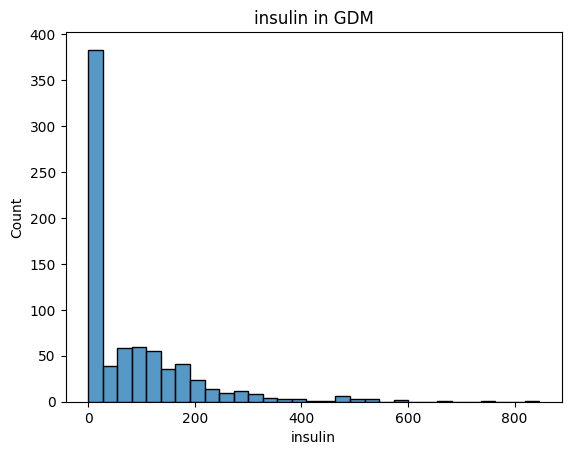

In [ ]:
sns.histplot(pima.insulin)
plt.title('insulin in GDM');

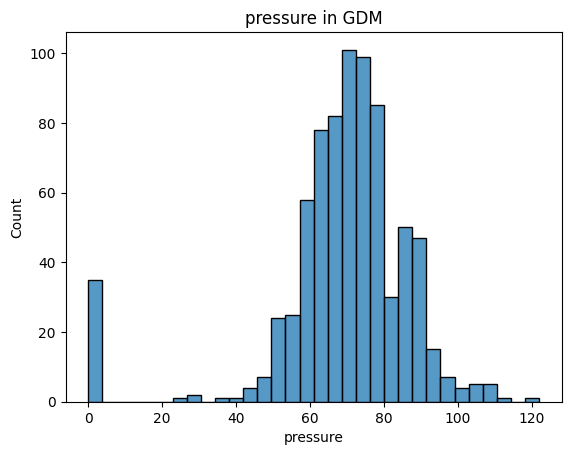

In [ ]:
sns.histplot(pima.pressure)
plt.title('pressure in GDM');

Text(0.5, 1.0, 'the sample age')

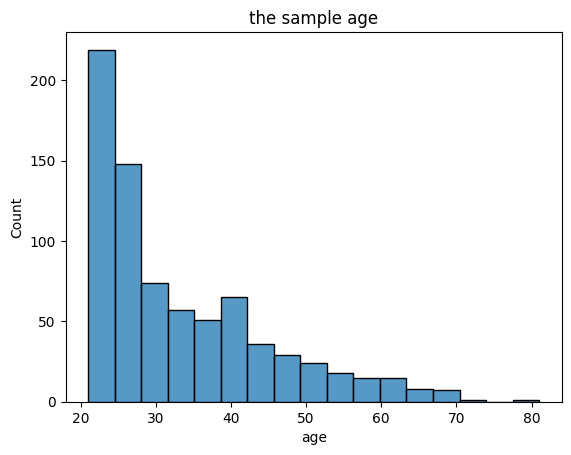

In [ ]:
sns.histplot(pima.age)
plt.title('the sample age')

In [ ]:
#i'll fill zeros (missing data) in (pressure) with average
pima['pressure'] = pima['pressure'].replace(0, pima['pressure'].mean())

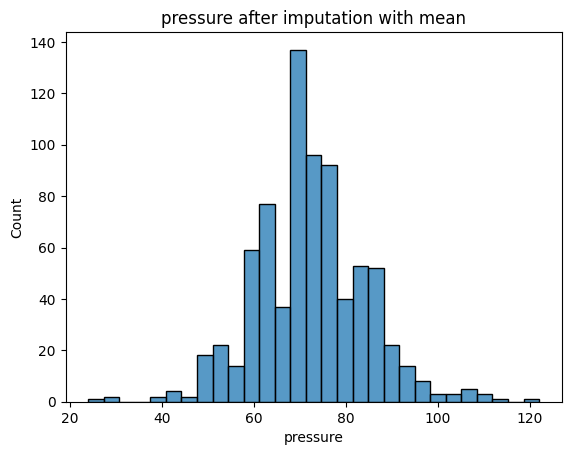

In [ ]:
sns.histplot(pima.pressure)
plt.title('pressure after imputation with mean');

In [ ]:
#replace zero with nan source (https://stackoverflow.com/questions/45416684/python-pandas-replace-multiple-columns-zero-to-nan)
import numpy as np
pima['insulin'] = pima['insulin'].replace(0, np.nan)

In [ ]:
#i'll fill zeros (missing data) in (insulin) using random forest (best method according to an article in my github repo)
#tutorial source(https://www.analyticsvidhya.com/blog/2022/05/handling-missing-values-with-random-forest/) < couldn't install one of the main packages so i'll impute with knn
#!pip install miceforest
#!pip install missingpy
#KNN imputer source (https://stackoverflow.com/questions/67525333/how-to-fill-missing-value-with-knn-in-python)

#pima['insulin'] = imputer.fit_transform(pima.insulin);
#b = ColumnTransformer([("num_imp", imputer, selector(dtype_include="number"))])

#pima = pd.DataFrame(imputer.fit_transform(pima),columns = pima.columns)

#^^^ HOT MESS



In [ ]:
# recode response variable to 1/0
pima = pima.replace({"diabetes": {"pos": 1, "neg": 0}})

In [ ]:
#Impute insulin with knn
#source (https://betterdatascience.com/impute-missing-data-with-python-and-knn/)
from sklearn.impute import KNNImputer
from sklearn.compose import ColumnTransformer

imputer = KNNImputer(n_neighbors=3)
imputed = imputer.fit_transform(pima)
pima_imputed = pd.DataFrame(imputed, columns=pima.columns)

Text(0.5, 1.0, 'insulin after KNN imputation')

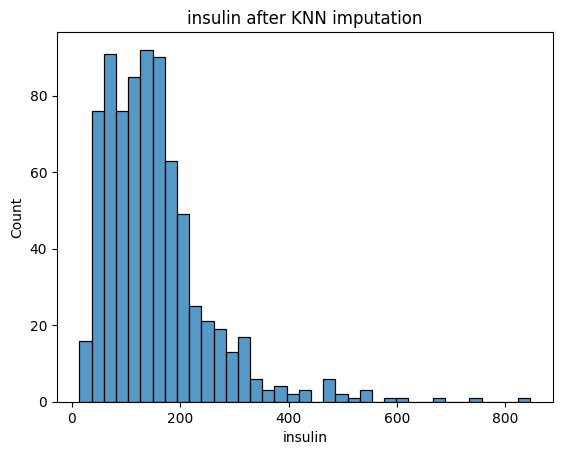

In [ ]:
sns.histplot(pima_imputed.insulin)
plt.title('insulin after KNN imputation')

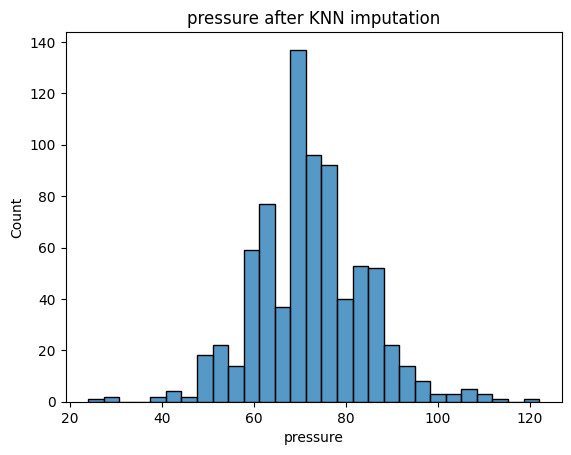

In [ ]:
sns.histplot(pima_imputed.pressure)
plt.title('pressure after KNN imputation');

In [ ]:
pima_corr = pima_imputed.select_dtypes(include='number').corr().style.background_gradient()

pima_corr

,pregnant,glucose,pressure,triceps,insulin,mass,pedigree,age,diabetes
pregnant,1.000000,0.129459,0.208984,-0.081672,0.076362,0.017683,-0.033523,0.544341,0.221898
glucose,0.129459,1.000000,0.218579,0.057328,0.589809,0.221071,0.137337,0.263514,0.466581
pressure,0.208984,0.218579,1.000000,0.020924,0.114986,0.242656,0.000371,0.326740,0.162986
triceps,-0.081672,0.057328,0.020924,1.000000,0.105624,0.392573,0.183928,-0.113970,0.074752
insulin,0.076362,0.589809,0.114986,0.105624,1.000000,0.229627,0.147046,0.235854,0.289578
mass,0.017683,0.221071,0.242656,0.392573,0.229627,1.000000,0.140647,0.036242,0.292695
pedigree,-0.033523,0.137337,0.000371,0.183928,0.147046,0.140647,1.000000,0.033561,0.173844
age,0.544341,0.263514,0.326740,-0.113970,0.235854,0.036242,0.033561,1.000000,0.238356
diabetes,0.221898,0.466581,0.162986,0.074752,0.289578,0.292695,0.173844,0.238356,1.000000


In [ ]:
#for the sake of easity i'll rename the df
pima = pima_imputed

Text(0.5, 1.0, 'insulin after naming')

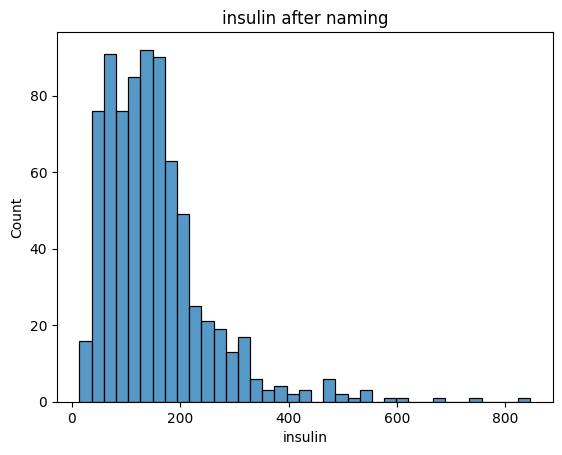

In [ ]:
sns.histplot(pima.insulin)
plt.title("insulin after naming")

In [ ]:
pima.head(2)

,pregnant,glucose,pressure,triceps,insulin,mass,pedigree,age,diabetes
0,6.0,148.0,72.0,35.0,125.333333,33.6,0.627,50.0,1.0
1,1.0,85.0,66.0,29.0,66.666667,26.6,0.351,31.0,0.0


In [ ]:
# create train/test split
train, test = train_test_split(
  pima,
  train_size=0.7,
  random_state=123,
  stratify=pima[["diabetes"]],
  )

# separate features from labels and only use numeric features
X_train = train.drop("diabetes", axis=1)
y_train = train[["diabetes"]].values.ravel()


## Simple logestic regression

In [ ]:
# model 1
lr_mod = LogisticRegression()
lr_fit1 = lr_mod.fit(X_train[["glucose"]], y_train)

In [ ]:
#overtime = pd.get_dummies(X_train[["OverTime"]].copy())

# model 2
lr_mod = LogisticRegression()
lr_fit2 = lr_mod.fit(X_train[["insulin"]], y_train)

Interpretation

In [ ]:
lr_fit1.predict_proba(X_train[["glucose"]])

array([[0.39608612, 0.60391388],
       [0.80524247, 0.19475753],
       [0.53831755, 0.46168245],
       ...,
       [0.88024575, 0.11975425],
       [0.68293669, 0.31706331],
       [0.50962308, 0.49037692]])

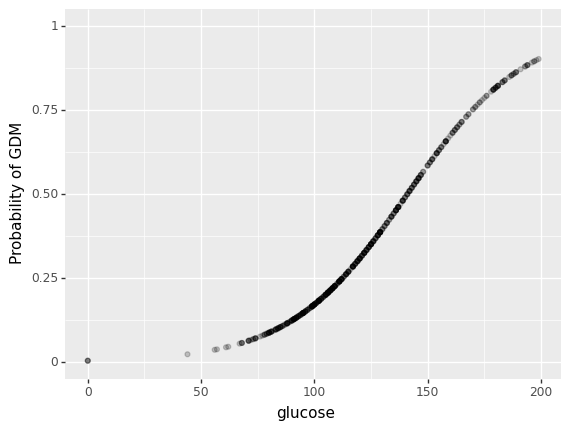

<ggplot: (8785108151831)>

In [ ]:
pred = pd.DataFrame(
  lr_fit1.predict_proba(X_train[["glucose"]]),
  columns=["neg", "pos"]
  )

pred["glucose"] = X_train["glucose"].reset_index(drop=True)

(ggplot(pred, aes('glucose', 'pos'))
  + geom_point(alpha=0.2)
  + scale_y_continuous(name="Probability of GDM", limits=(0, 1)))

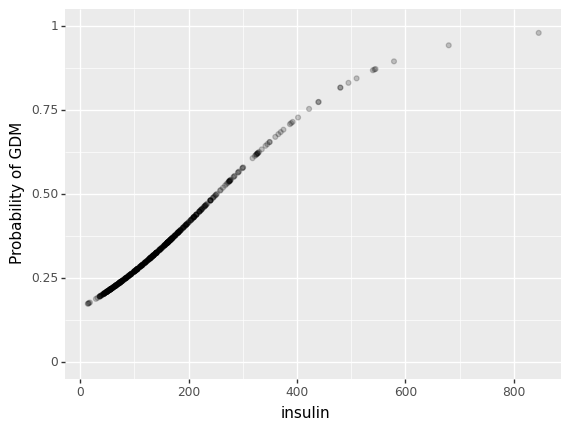

<ggplot: (8785108197434)>

In [ ]:
pred = pd.DataFrame(
  lr_fit2.predict_proba(X_train[["insulin"]]),
  columns=["neg", "pos"]
  )

pred["insulin"] = X_train["insulin"].reset_index(drop=True)

(ggplot(pred, aes('insulin', 'pos'))
  + geom_point(alpha=0.2)
  + scale_y_continuous(name="Probability of GDM", limits=(0, 1)))

##Multiple LR

In [ ]:
#feat = pd.get_dummies(X_train[["OverTime"]].copy())
#feat = X_train["glucose"]
#feat["insulin"] = X_train["insulin"]
ft = X_train[['glucose', 'pressure']]


In [ ]:
pima.describe()

,pregnant,glucose,pressure,triceps,insulin,mass,pedigree,age,diabetes
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,72.254807,20.536458,153.093316,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,12.115932,15.952218,99.190632,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,24.000000,0.000000,14.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,0.000000,83.500000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,135.000000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,188.333333,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
# model 3
#lr_mod = LogisticRegression()
lr_fit3 = lr_mod.fit(ft, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


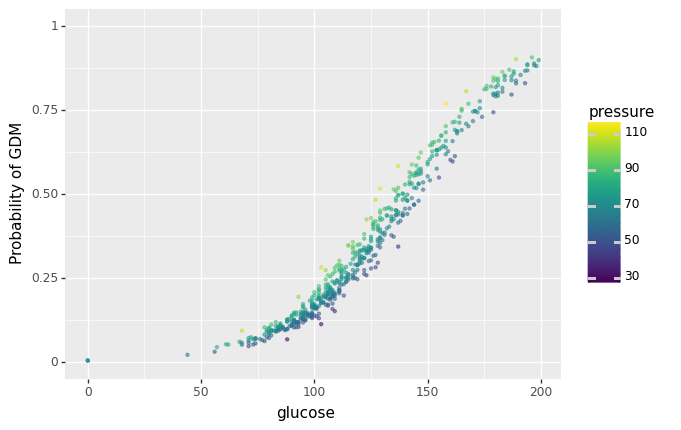

<ggplot: (8785108198292)>

In [ ]:
pred = pd.DataFrame(
  lr_fit3.predict_proba(ft),
  columns=["No", "Yes"]
  )

pred = pred.join(X_train[["glucose", "pressure"]].reset_index(drop=True))

(ggplot(pred, aes("glucose", "Yes", color="pressure"))
  + geom_point(alpha=0.5, size=0.8)
  + scale_y_continuous(name="Probability of GDM", limits=(0, 1)))

In [ ]:
from sklearn import metrics

## Assessing model accuracy

### Basic model performance

In [ ]:
lr1_pred = lr_fit1.predict_proba(X_train[["glucose"]])
auc = roc_auc_score(y_train, lr1_pred[:, 1])
round(auc, 3)

0.794

### Cross-validation performance

In [ ]:
cv_lr = LogisticRegressionCV(
  cv=5,
  solver='liblinear',
  scoring='roc_auc',
  random_state=123).fit(X_train[["glucose"]], y_train)

auc = cv_lr.score(X_train[["glucose"]], y_train)
round(auc, 3)

0.794

### Model comparison performance

In [ ]:
# feature sets to compare across
feature_set1 = X_train[["glucose"]]
feature_set2 = X_train[["pressure"]]
#feature_set2 = pd.get_dummies(X_train[["OverTime"]].copy())
feature_set3 = feat = X_train[["pressure"]]
#feature_set3["glucose"] = X_train["gluxose"]
feature_sets = {'lr1': feature_set1, 'lr2': feature_set2, 'lr3': feature_set3}

# object to store CV RMSE results
results = {}

for name, feat in feature_sets.items():
  # train LR model
  cv_lr = LogisticRegressionCV(
    cv=5,
    solver='liblinear',
    scoring='roc_auc',
    random_state=123).fit(feat, y_train)

  auc = cv_lr.score(feat, y_train)
  results[name] = round(auc, 3)

# print out results
results

{'lr1': 0.794, 'lr2': 0.603, 'lr3': 0.603}

In [ ]:
#source(https://stackoverflow.com/questions/60321389/sklearn-importerror-cannot-import-name-plot-roc-curve)
from sklearn.metrics import RocCurveDisplay
#svc_disp = RocCurveDisplay.from_estimator(svc, X_test, y_test)
#rfc_disp = RocCurveDisplay.from_estimator(rfc, X_test, y_test, ax=svc_disp.ax_)

### Performance visualization

<ipython-input-78-a4e4b353af02>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<ipython-input-78-a4e4b353af02>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


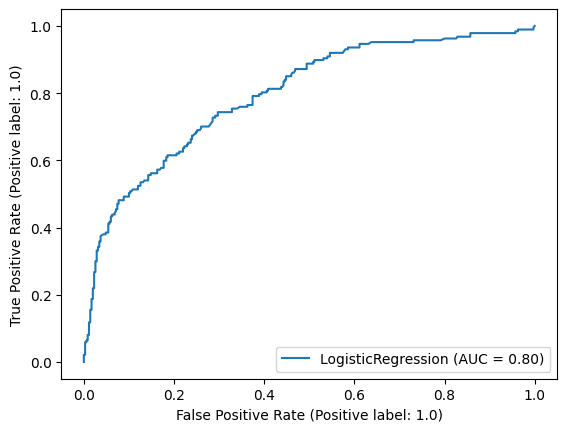

In [ ]:
# the built in ROC curve plot uses matplotlib

# create OverTime & MonthlyIncome features
#feat = pd.get_dummies(X_train[["OverTime"]].copy())
feat["glucose"] = X_train["glucose"]
feat["pressure"] = X_train["pressure"]

# model 3
lr_mod = LogisticRegression()
lr_fit3 = lr_mod.fit(feat, y_train)

# create ROC curve
RocCurveDisplay.from_estimator(lr_fit3, feat, y_train)
plt.show();